In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'animal_images/data/', # Eğitim verisi klasörü yolu
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    'animal_images/test/', # Test verisi klasörü yolu
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical')


NUMBER_OF_CLASSES = len(training_set.class_indices)


Found 21959 images belonging to 12 classes.
Found 0 images belonging to 0 classes.


In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(244, 244, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=NUMBER_OF_CLASSES, activation='softmax')) # NUMBER_OF_CLASSES: Sınıf sayınız

model.summary()

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(
    training_set,
    epochs=25,
    validation_data=test_set)


Epoch 1/25


2023-08-17 11:49:39.691615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


242/687 [=========>....................] - ETA: 1:51 - loss: 2.1299 - accuracy: 0.3113

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


687/687 [==============================] - 172s 249ms/step - loss: 1.8165 - accuracy: 0.3877
Epoch 2/25
687/687 [==============================] - 180s 262ms/step - loss: 1.4211 - accuracy: 0.5166
Epoch 3/25
687/687 [==============================] - 187s 272ms/step - loss: 1.2628 - accuracy: 0.5732
Epoch 4/25
687/687 [==============================] - 193s 281ms/step - loss: 1.1557 - accuracy: 0.6091
Epoch 5/25
687/687 [==============================] - 209s 304ms/step - loss: 1.0840 - accuracy: 0.6385
Epoch 6/25
687/687 [==============================] - 216s 315ms/step - loss: 1.0277 - accuracy: 0.6517
Epoch 7/25
687/687 [==============================] - 224s 325ms/step - loss: 0.9718 - accuracy: 0.6730
Epoch 8/25
687/687 [==============================] - 225s 327ms/step - loss: 0.9213 - accuracy: 0.6898
Epoch 9/25
687/687 [==============================] - 308s 448ms/step - loss: 0.8717 - accuracy: 0.7091
Epoch 10/25
687/687 [==============================] - 357s 519ms/step - lo

In [11]:
model.save('animal_classifier.h5') 

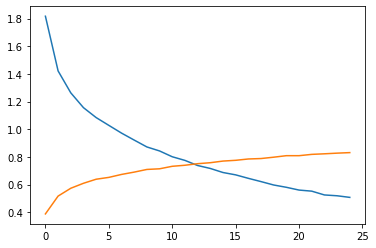

In [18]:
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["accuracy"])

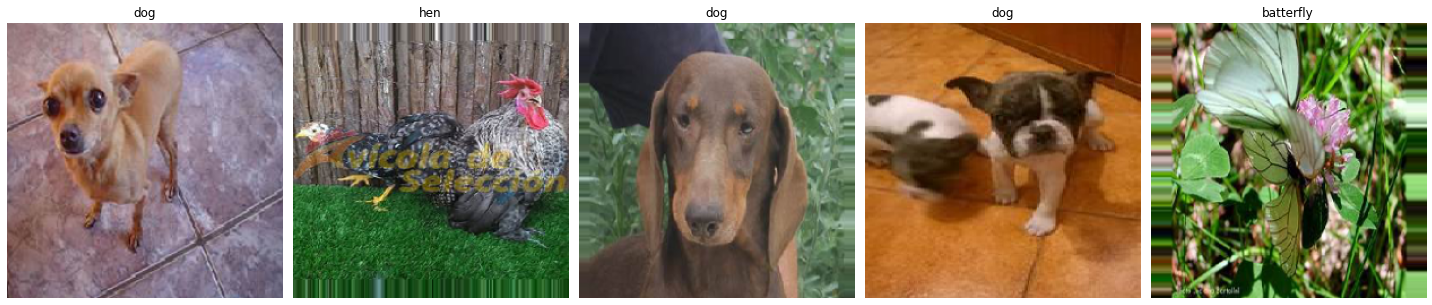

In [62]:
import matplotlib.pyplot as plt

def plot_images(images_arr, labels_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, lbl, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.set_title(lbl)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Eğitim setinden bir batch al
images, labels = next(training_set)

# Görselleştir
plot_images(images, [list(training_set.class_indices.keys())[np.argmax(lab)] for lab in labels])


In [488]:
test_set = test_datagen.flow_from_directory(
    'animal_images/test/', # Test verisi klasörü yolu
    target_size=(244, 244),
    class_mode='categorical')



Found 101 images belonging to 11 classes.


In [489]:
test_batch = iter(test_set)

# Tüm test verisini tahmin et:

Test label :  cow


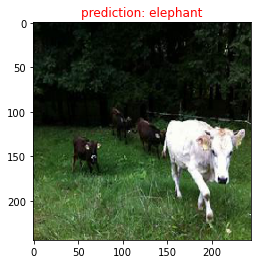

In [626]:
test_data = next(iter(test_set))
image_array, label = test_data  # Görüntü dizisi ve etiketler

prediction = model.predict(image_array)
test = prediction[0]

prediction_index = np.argmax(test)

print("Test label : ", list(test_batch.class_indices)[np.argmax(label[0])])
plt.title("prediction: "+list(test_batch.class_indices)[prediction_index], color="red")
plt.imshow(image_array[0]);

# tek görüntüyü tahmin et:

Predicted label: dog


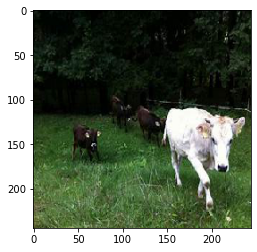

In [525]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Tahmin etmek istediğiniz resmin dosya yolu
image_path = 'animal_images/test/cow/OIP-_01xh7qI0nvypZLkOxGyIgHaFi.jpeg'

# Görüntüyü modele uygun boyuta ve formatlı hale getirin
img = image.load_img(image_path, target_size=(244, 244))
test_img = image.img_to_array(img)
test_img = np.expand_dims(test_img, axis=0)  # Tek bir örnek için boyut ekleyin
test_img /= 255.0  # Veriyi 0-1 aralığına getirin

# Tahmin yapın
predictions = model.predict(test_img)

# Tahmin sonuçlarını işleyin
class_indices = training_set.class_indices  # Sınıf indeksleri ve etiketleri
predicted_class = np.argmax(predictions, axis=1)[0]
predicted_label = list(class_indices.keys())[list(class_indices.values()).index(predicted_class)]

plt.imshow(img)
#print("Predicted class:", predicted_class)
print("Predicted label:", predicted_label)
